# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set up lists to hold response info
kept_cities = []
city_lat = []
city_lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []

record = 0
set_count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        kept_cities.append(response["name"])
        
        record = record + 1
        if record == 51:
            record = 1
            set_count +=1
            
        print(f"Processing Record {record} of Set {set_count} | {city}")
        
    except KeyError:
        print("City not found. Skipping...")
        



Processing Record 1 of Set 1 | coquimbo
City not found. Skipping...
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | hofn
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | vicuna
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | mvomero
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | poum
Processing Record 14 of Set 1 | kushiro
Processing Record 15 of Set 1 | kibakwe
Processing Record 16 of Set 1 | bambanglipuro
City not found. Skipping...
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | berlevag
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | sao joao da barra
Processin

Processing Record 34 of Set 4 | komsomolskiy
Processing Record 35 of Set 4 | jalu
Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | saint-francois
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | karpogory
Processing Record 42 of Set 4 | adrar
City not found. Skipping...
Processing Record 43 of Set 4 | filingue
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | karpathos
Processing Record 46 of Set 4 | cartagena del chaira
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | teeli
Processing Record 50 of Set 4 | santa ana
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | tecpan
Processing Record 4 of Set 5 | taoudenni
City not found. Skipping...
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of S

Processing Record 21 of Set 8 | limoux
Processing Record 22 of Set 8 | shatki
Processing Record 23 of Set 8 | alexandria
Processing Record 24 of Set 8 | east london
City not found. Skipping...
Processing Record 25 of Set 8 | redmond
Processing Record 26 of Set 8 | gazanjyk
Processing Record 27 of Set 8 | fasa
Processing Record 28 of Set 8 | chapais
Processing Record 29 of Set 8 | touba
Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | bafilo
Processing Record 32 of Set 8 | kismayo
Processing Record 33 of Set 8 | batagay-alyta
Processing Record 34 of Set 8 | mossendjo
Processing Record 35 of Set 8 | the valley
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | nador
Processing Record 38 of Set 8 | carballo
Processing Record 39 of Set 8 | loandjili
Processing Record 40 of Set 8 | zhigansk
City not found. Skipping...
Processing Record 41 of Set 8 | fort wellington
Processing Record 42 of Set 8 | maputo
Processing Record 43 of Set 8 | prin

Processing Record 11 of Set 12 | kano
City not found. Skipping...
Processing Record 12 of Set 12 | trofors
Processing Record 13 of Set 12 | lasa
Processing Record 14 of Set 12 | carmona
Processing Record 15 of Set 12 | mahibadhoo
Processing Record 16 of Set 12 | trepuzzi
Processing Record 17 of Set 12 | honningsvag
Processing Record 18 of Set 12 | usinsk
Processing Record 19 of Set 12 | tahta
Processing Record 20 of Set 12 | gemena
Processing Record 21 of Set 12 | fort pierce


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:
weather_df = pd.DataFrame({"City": kept_cities, "Lat": city_lat, 
           "Lng": city_lng, "Max Temp": max_temp, 
           "Humidity": humidity, "Cloudiness": cloud,
           "Wind Speed": wind_speed, "Country": country, 
           "Date": date})
weather_df.head()
weather_df.to_csv("../output_data/weatherdata.csv", index=False, header=True)

In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.092669,17.534124,69.228634,70.364273,51.982487,7.939317,1.627774e+09
std,33.275665,90.251761,13.937655,21.710949,37.958237,5.539358,1.818962e+02
min,-54.800000,-179.166700,33.750000,10.000000,0.000000,0.000000,1.627773e+09
25%,-6.483350,-61.201450,59.155000,57.500000,15.000000,3.940000,1.627774e+09
50%,26.184200,19.766700,70.560000,76.000000,50.000000,6.670000,1.627774e+09
75%,49.983200,97.183350,78.730000,87.000000,91.000000,10.670000,1.627774e+09
max,78.218600,179.316700,108.280000,100.000000,100.000000,32.390000,1.627774e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Skipped step, max humidity was 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

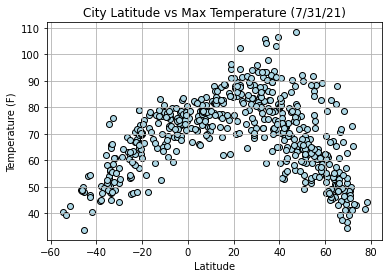

For world weather data, this plot is visually showing higher temperatures closer to the equator, and lower temperatures farther from the equator.


In [74]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (7/31/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities_hw.png")

# Show plot
plt.show()
print("For world weather data, this plot is visually showing higher temperatures closer to the equator, and lower temperatures farther from the equator.")

## Latitude vs. Humidity Plot

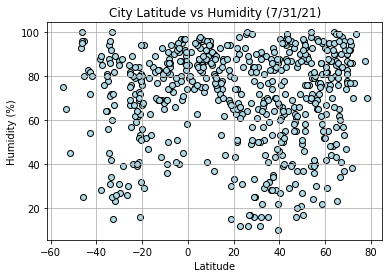

There doesn't seem to be too much correlation between humidity and proximity to the equator.


In [75]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (7/31/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities_hw.png")

# Show plot
plt.show()

print("There doesn't seem to be too much correlation between humidity and proximity to the equator.")

## Latitude vs. Cloudiness Plot

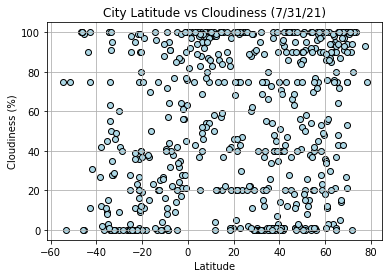

Similar to above, cloudiness percentages are spread widely across the latitude.


In [76]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (7/31/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities_hw.png")

# Show plot
plt.show()

print("Similar to above, cloudiness percentages are spread widely across the latitude.")

## Latitude vs. Wind Speed Plot

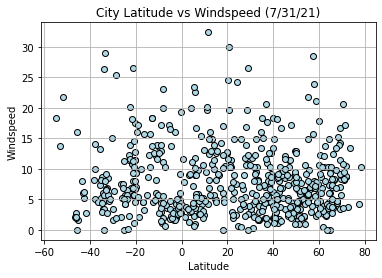

Similar to above, windspeeds are spread widely across the latitude.


In [77]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", color="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Windspeed (7/31/21)")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities_hw.png")

# Show plot
plt.show()
print("Similar to above, windspeeds are spread widely across the latitude.")

## Linear Regression

In [17]:
#separate data into northern hemisphere
north_weather = weather_df.loc[weather_df["Lat"]>=0]
north_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Saskylakh,71.9167,114.0833,73.00,38,0,8.75,RU,1627772996
2,Hofn,64.2539,-15.2082,51.01,90,21,7.43,IS,1627772991
7,Nikolskoye,59.7035,30.7861,62.49,93,36,5.88,RU,1627773392
10,Laguna,38.4210,-121.4238,103.24,28,1,7.00,US,1627773450
13,Kushiro,42.9750,144.3747,72.55,94,75,10.36,JP,1627773585


In [18]:
#separate data into southern hemisphere
south_weather = weather_df.loc[weather_df["Lat"]<0]
south_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,51.53,87,0,3.44,CL,1627773582
3,Codrington,-38.2667,141.9667,44.56,88,27,8.14,AU,1627773429
4,Vicuña,-30.0319,-70.7081,44.33,31,60,1.57,CL,1627773583
5,Busselton,-33.6500,115.3333,45.09,72,91,28.92,AU,1627773583
6,New Norfolk,-42.7826,147.0587,46.92,54,11,5.19,AU,1627773583


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

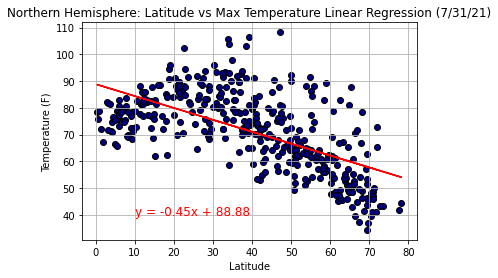

There is a negative correlation between latitude and the max temperature for the northern hemisphere, proving visually that temperatures gradually drop with increasing latitude.


In [78]:
x_values = north_weather["Lat"]
y_values = north_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="navy", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=12,color="red")
plt.title("Northern Hemisphere: Latitude vs Max Temperature Linear Regression (7/31/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("northlattemp_hw.png")
plt.show()

print("There is a negative correlation between latitude and the max temperature for the northern hemisphere, proving visually that temperatures gradually drop with increasing latitude.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

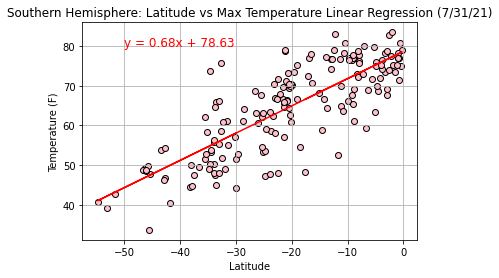

There is a positive correlation between latitude and the max temperature for the southern hemisphere, proving as approaching the equator the temperature gradually increases.


In [79]:
x_values = south_weather["Lat"]
y_values = south_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")
plt.title("Southern Hemisphere: Latitude vs Max Temperature Linear Regression (7/31/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("southlattemp_hw.png")
plt.show()

print("There is a positive correlation between latitude and the max temperature for the southern hemisphere, proving as approaching the equator the temperature gradually increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

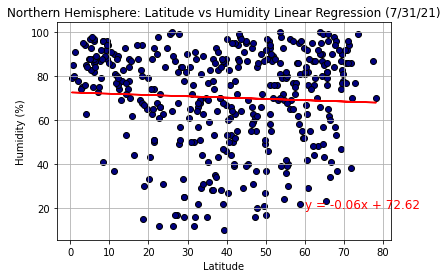

There is a weak negative correlation between latitude and wind speed.


In [80]:
x_values = north_weather["Lat"]
y_values = north_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="navy", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=12,color="red")
plt.title("Northern Hemisphere: Latitude vs Humidity Linear Regression (7/31/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("northhumidity.png")
plt.show()

print("There is a weak negative correlation between latitude and wind speed.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

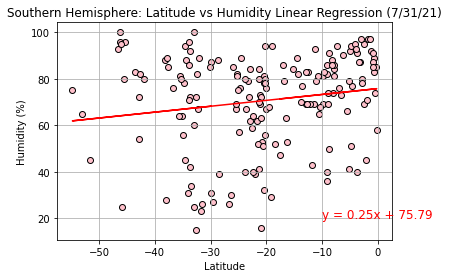

There is a weak positive correlation between latitude and wind speed.


In [81]:
x_values = south_weather["Lat"]
y_values = south_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=12,color="red")
plt.title("Southern Hemisphere: Latitude vs Humidity Linear Regression (7/31/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("southhumidity.png")
plt.show()
print("There is a weak positive correlation between latitude and wind speed.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

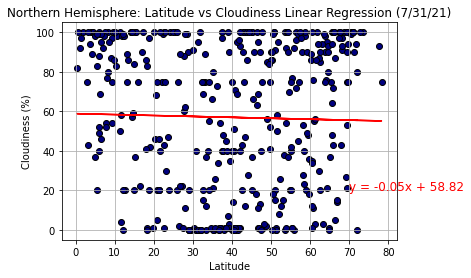

There is a weak negative correlation between latitude and cloudiness.


In [82]:
x_values = north_weather["Lat"]
y_values = north_weather["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="navy", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=12,color="red")
plt.title("Northern Hemisphere: Latitude vs Cloudiness Linear Regression (7/31/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("northcloud.png")
plt.show()
print("There is a weak negative correlation between latitude and cloudiness.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

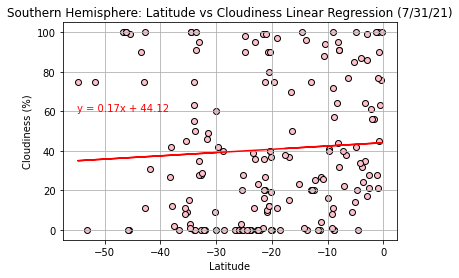

There is a weak positive correlation between latitude and cloudiness.


In [83]:
x_values = south_weather["Lat"]
y_values = south_weather["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=10,color="red")
plt.title("Southern Hemisphere: Latitude vs Cloudiness Linear Regression (7/31/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("southcloud.png")
plt.show()
print("There is a weak positive correlation between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

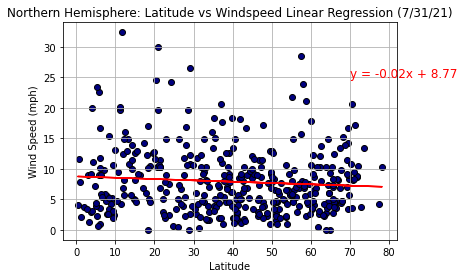

There is a weak negative correlation between latitude and wind speed.


In [84]:
x_values = north_weather["Lat"]
y_values = north_weather["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="navy", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,25),fontsize=12,color="red")
plt.title("Northern Hemisphere: Latitude vs Windspeed Linear Regression (7/31/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("northwind.png")
plt.show()
print("There is a weak negative correlation between latitude and wind speed.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

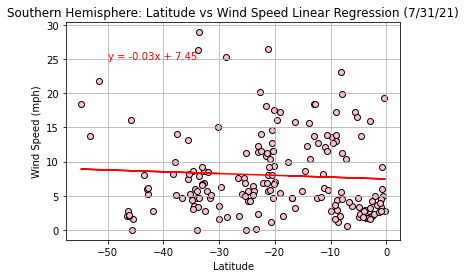

There is a weak negative correlation between latitude and wind speed.


In [85]:
x_values = south_weather["Lat"]
y_values = south_weather["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=10,color="red")
plt.title("Southern Hemisphere: Latitude vs Wind Speed Linear Regression (7/31/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("southwind.png")
plt.show()
print("There is a weak negative correlation between latitude and wind speed.")